# **Importação da tabela e criação da variável target**

In [ ]:
import pandas as pd
from csv import QUOTE_NONNUMERIC
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


url = "https://github.com/andersonzambeli/ine5644/blob/main/simu_com_empreendimento_tot_veic.csv?raw=true"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, sep=';')

print(dataset.columns)
print(dataset.shape)


periodos = [60, 180, 365]

# conditions = [
#     (dataset['diferenca_antes_depois_' + str(periodos[2])] == 0),
#     (dataset['diferenca_antes_depois_' + str(periodos[2])] < 0),
#     (dataset['diferenca_antes_depois_' + str(periodos[2])] > 0)
#     ]

# values = ['Nao_influenciou', 'Aumentou', 'Diminuiu']
# dataset['Target'] = np.select(conditions, values)

x=0.135
conditions = [
    (dataset['razao_antes_depois_' + str(periodos[2])] == np.inf),
    (dataset['razao_antes_depois_' + str(periodos[2])].between(1-x, 1+x)),
    (dataset['razao_antes_depois_' + str(periodos[2])] <= 1-x),
    (dataset['razao_antes_depois_' + str(periodos[2])] >= 1+x)
    ]

values = ['Inf', 'Nao_influenciou', 'Aumentou', 'Diminuiu']
dataset['Target'] = np.select(conditions, values)

dataset.drop(dataset[dataset["Target"] == "Inf"].index, inplace=True)
dataset.drop(dataset[dataset["Target"] == "0"].index, inplace=True)
dataset.drop(dataset[dataset["Target"] == "Nao_influenciou"].index, inplace=True)


# # Numeração dos empreendimentos

# conditions = [
#     (dataset["cluster_empreendimento"] == "PAVIMENTACAO"),
#     (dataset["cluster_empreendimento"] == "IMPLANTACAO"),
#     (dataset["cluster_empreendimento"] == "INFRAESTRUTURA"),
#     (dataset["cluster_empreendimento"] == "RECAPEAMENTO")
#     ]

# values = [0, 1, 2, 3]

# # Numeração dos Programas

# dataset["cluster_empreendimento_num"] = np.select(conditions, values)

# conditions = [
#     (dataset["programa"] == "AVANÇAR PÚBLICO"),
#     (dataset["programa"] == "EMENDAS"),
#     (dataset["programa"] == "PAC FIN"),
#     (dataset["programa"] == "SETOR PRIVADO")
#     ]

# values = [0, 1, 2, 3]

# dataset["programa_num"] = np.select(conditions, values)

# # Numeração dos estados

estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA','PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']

conditions = [
    (dataset["uf_SIGLA_UF"] == x) for x in estados]

values = range(len(estados))

dataset["uf_SIGLA_UF_num"] = np.select(conditions, values)

dataset.head()



print(dataset['Populacao'])




dataset = dataset.reset_index()

one_hot_programa = pd.get_dummies(dataset[ ["programa"] ])
one_hot_empreendimento = pd.get_dummies(dataset[ ["cluster_empreendimento"] ])
one_hot_uf = pd.get_dummies(dataset[ ["uf_SIGLA_UF"] ])
one_hot_acao = pd.get_dummies(dataset[ ["acao"] ])
one_hot_municipio = pd.get_dummies(dataset[ ["mun_MUNNOMEX"] ])
print(dataset['Populacao'])

#one_hot_municipio

Index(['cod_mdr', 'dsc_situacao_contrato_mdr', 'dsc_situacao_objeto_mdr',
       'programa', 'acao', 'uf_SIGLA_UF', 'mun_MUNNOMEX', 'Código IBGE',
       'empreendimento', 'cluster_empreendimento', 'situacao_obra',
       'situacao_obra_base_validacao', 'situacao_contrato', 'prc_fisico',
       'dte_inicio_obra', 'dte_fim_obra', 'pop_beneficiada',
       'vlr_investimento', 'Populacao', 'mun_ALTITUDE', 'mun_AREA',
       'dte_antes_60', 'dte_depois_60', 'dte_antes_180', 'dte_depois_180',
       'dte_antes_365', 'dte_depois_365', 'cont_antes_60', 'cont_depois_60',
       'cont_antes_180', 'cont_depois_180', 'cont_antes_365',
       'cont_depois_365', 'razao_antes_depois_60', 'diferenca_antes_depois_60',
       'razao_antes_depois_180', 'diferenca_antes_depois_180',
       'razao_antes_depois_365', 'diferenca_antes_depois_365', 'tot_veic'],
      dtype='object')
(7647, 40)
1       49721.0
2       15018.0
3       19193.0
4       13622.0
5       17772.0
         ...   
7638    73061.0
7639

# **Separando os dados em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

# FEATURE_NAMES = ["pop_beneficiada", "vlr_investimento", "Populacao", "mun_ALTITUDE", "mun_AREA", "programa_num", "uf_SIGLA_UF_num"]

# X = pd.DataFrame(dataset, columns = FEATURE_NAMES)

y = dataset['Target']
print(y)

X = dataset[["pop_beneficiada", "vlr_investimento", "Populacao", "mun_ALTITUDE", "mun_AREA", "tot_veic"]]
X = pd.concat([ X,one_hot_empreendimento], axis=1)
X = pd.concat([ X,one_hot_programa], axis=1)
X = pd.concat([ X,one_hot_uf], axis=1)
X = pd.concat([ X,one_hot_acao], axis=1)
# X = pd.concat([ X,one_hot_municipio], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X.head()
#y.value_counts()

X_cluster = dataset[["pop_beneficiada", "vlr_investimento", "Populacao", "mun_ALTITUDE", "mun_AREA", "tot_veic", "Target"]]
#print(X_cluster.info())
X_cluster = pd.concat([ X_cluster,one_hot_empreendimento], axis=1)
X_cluster = pd.concat([ X_cluster,one_hot_programa], axis=1)
X_cluster = pd.concat([ X_cluster,one_hot_uf], axis=1)
X_cluster = pd.concat([ X_cluster,one_hot_acao], axis=1)
# X_cluster = pd.concat([ X_cluster,one_hot_municipio], axis=1)
X_cluster.info()




0       Diminuiu
1       Aumentou
2       Aumentou
3       Aumentou
4       Diminuiu
          ...   
5768    Aumentou
5769    Diminuiu
5770    Aumentou
5771    Aumentou
5772    Aumentou
Name: Target, Length: 5773, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   pop_beneficiada                        5773 non-null   float64
 1   vlr_investimento                       5773 non-null   float64
 2   Populacao                              5773 non-null   float64
 3   mun_ALTITUDE                           5773 non-null   float64
 4   mun_AREA                               5773 non-null   float64
 5   tot_veic                               5773 non-null   float64
 6   Target                                 5773 non-null   object 
 7   cluster_empreendimento_IMPLANTACAO     5773 non

# **Modelo de árvore de decisão**

Treinamenento do modelo

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# model = GradientBoostingClassifier(random_state=1, learning_rate=0.1) # 0.56
# model.fit(X_train,y_train)

model = RandomForestClassifier(criterion='log_loss', max_depth=90) # 0.57
model.fit(X_train,y_train)

# model = DecisionTreeClassifier(criterion='log_loss', max_depth= 30) # 0.53
# model.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=90)

Avaliação do modelo

In [ ]:

accuracy_train = sum(model.predict(X_train)==y_train)/len(y_train)
accuracy_test = sum(model.predict(X_test)==y_test)/len(y_test)
print(f"Acurácia no conjunto de treinamento = {accuracy_train} - acurácia no conjunto de teste = {accuracy_test}")

Acurácia no conjunto de treinamento = 0.9990101460034645 - acurácia no conjunto de teste = 0.6414549653579676


In [ ]:
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
!dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.357922 to fit


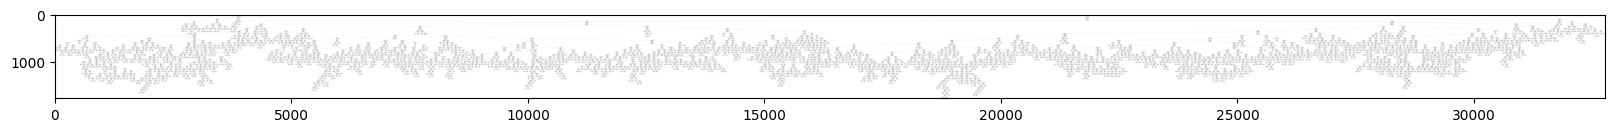

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

# **NAIVE BAYES**

Treinamento do Modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Avaliação do modelo

In [ ]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

    Aumentou       0.57      0.97      0.71       990
    Diminuiu       0.36      0.03      0.05       753

    accuracy                           0.56      1743
   macro avg       0.46      0.50      0.38      1743
weighted avg       0.48      0.56      0.43      1743



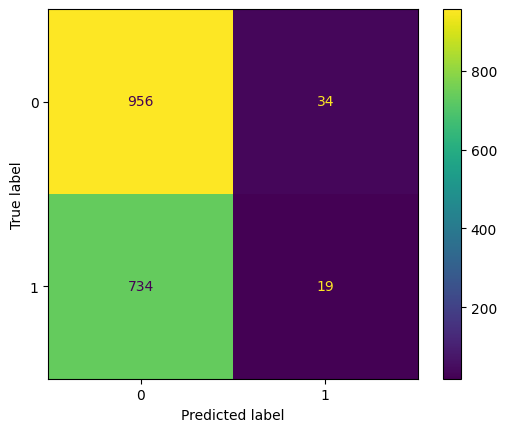

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **SVM**

Treinamento

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

Avaliação

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **MPL**

Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Treinamento

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(80,140,80,20),max_iter=8000,random_state=1, activation='relu', solver='adam', alpha=0.001)
mlp.fit(X_train, y_train.values.ravel())


# from sklearn.neural_network import MLPClassifier


# mlp = MLPClassifier(hidden_layer_sizes=(100,200,70),max_iter=8000,random_state=1, activation='relu', solver='adam', alpha=0.001)
# mlp.fit(X_train, y_train.values.ravel())



MLPClassifier(alpha=0.001, hidden_layer_sizes=(80, 140, 80, 20), max_iter=8000,
              random_state=1)

Avaliação

              precision    recall  f1-score   support

    Aumentou       0.66      0.58      0.62       983
    Diminuiu       0.53      0.62      0.57       749

    accuracy                           0.59      1732
   macro avg       0.59      0.60      0.59      1732
weighted avg       0.60      0.59      0.59      1732



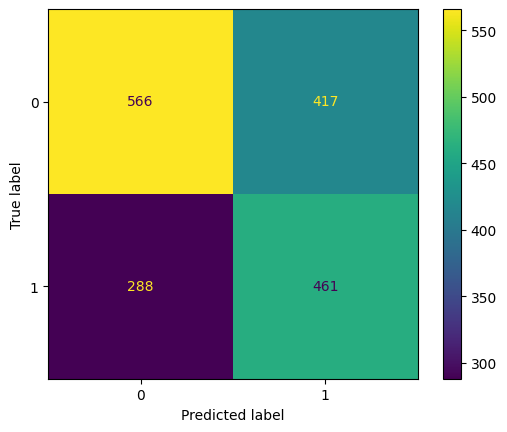

In [ ]:
y_pred = mlp.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test,y_pred))

# **KNN**

Treinamento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#treino
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

Avaliação

              precision    recall  f1-score   support

    Aumentou       0.62      0.67      0.64       990
    Diminuiu       0.51      0.45      0.48       753

    accuracy                           0.57      1743
   macro avg       0.56      0.56      0.56      1743
weighted avg       0.57      0.57      0.57      1743



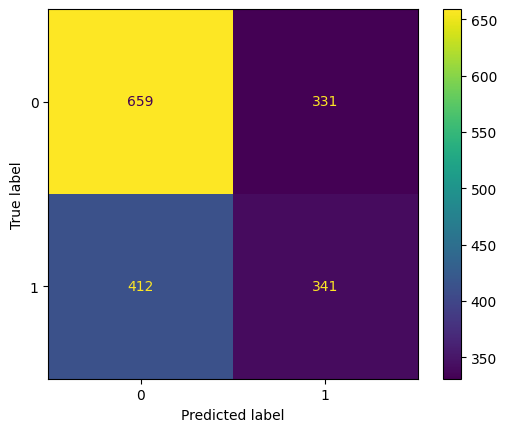

In [ ]:
y_pred = model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test,y_pred))

# **Gaussian Process**

Treinamento

In [ ]:
# Lento

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

model = GaussianProcessClassifier(kernel=kernel, random_state=0)
model.fit(X_train, y_train)

KeyboardInterrupt: 

Avaliação

In [ ]:
y_pred = mlp.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test,y_pred))

# **Clusterização e predição 2**

In [ ]:
datacluster = X_cluster
datacluster_y = datacluster["Target"]
print(datacluster["Target"])

# one_hot_target = pd.get_dummies(datacluster[ ["Target"] ])
# datacluster = pd.concat([ datacluster,one_hot_target], axis=1)

datacluster1 = datacluster.drop(columns={"Target"})
# print(datacluster1.info())




0       Diminuiu
1       Aumentou
2       Aumentou
3       Aumentou
4       Diminuiu
          ...   
5768    Aumentou
5769    Diminuiu
5770    Aumentou
5771    Aumentou
5772    Aumentou
Name: Target, Length: 5773, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
k = 200
scaler = StandardScaler()
datacluster2 = scaler.fit_transform(datacluster1)
datacluster2 = pd.DataFrame(datacluster2, columns = datacluster1.columns)
datacluster_select = datacluster2[["Populacao", "mun_ALTITUDE", "mun_AREA"]]

In [ ]:
kmeans2 = KMeans(n_clusters=k, random_state=0, n_init="auto", max_iter=500).fit(datacluster_select)
print(kmeans2.labels_)
print(kmeans2.inertia_)
# kmeans.feature_names_in_
datacluster2.loc[:,"cluster"] = kmeans2.labels_

datacluster2 = datacluster2.drop(columns={"Populacao", "mun_ALTITUDE", "mun_AREA"})

datacluster2_percent = datacluster2["cluster"].value_counts().div(len(X))
print(datacluster2_percent)
datacluster2.info()

[ 51   9  56 ... 143  83  93]
164.6595721716503
cluster
9      0.023731
30     0.020786
111    0.018535
56     0.018361
126    0.016456
         ...   
161    0.000173
186    0.000173
49     0.000173
62     0.000173
6      0.000173
Name: count, Length: 200, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   pop_beneficiada                        5773 non-null   float64
 1   vlr_investimento                       5773 non-null   float64
 2   tot_veic                               5773 non-null   float64
 3   cluster_empreendimento_IMPLANTACAO     5773 non-null   float64
 4   cluster_empreendimento_INFRAESTRUTURA  5773 non-null   float64
 5   cluster_empreendimento_PAVIMENTACAO    5773 non-null   float64
 6   cluster_empreendimento_RECAPEAMENTO    5773 non-null   float64
 7   pro

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
# datacluster2.info()
# datacluster3 = datacluster2.drop(columns={"Target_Aumentou","Target_Diminuiu"})
datacluster2["cluster"] = datacluster2["cluster"].astype(str)
one_hot_cluster = pd.get_dummies(datacluster2[ ["cluster"] ])
print(one_hot_cluster)
datacluster3 = pd.concat([ datacluster2, one_hot_cluster], axis=1)
# datacluster3.info()


      cluster_0  cluster_1  cluster_10  cluster_100  cluster_101  cluster_102  \
0         False      False       False        False        False        False   
1         False      False       False        False        False        False   
2         False      False       False        False        False        False   
3         False      False       False        False        False        False   
4         False      False       False        False        False        False   
...         ...        ...         ...          ...          ...          ...   
5768      False      False       False        False        False        False   
5769      False      False       False        False        False        False   
5770      False      False       False        False        False        False   
5771      False      False       False        False        False        False   
5772      False      False       False        False        False        False   

      cluster_103  cluster_

In [ ]:
print(datacluster3['vlr_investimento'])
print(datacluster_y)

0       1.477588
1       1.303786
2       6.623765
3       4.114068
4       6.532302
          ...   
5768   -0.216751
5769   -0.372697
5770    0.387017
5771    1.362645
5772    6.220922
Name: vlr_investimento, Length: 5773, dtype: float64
0       Diminuiu
1       Aumentou
2       Aumentou
3       Aumentou
4       Diminuiu
          ...   
5768    Aumentou
5769    Diminuiu
5770    Aumentou
5771    Aumentou
5772    Aumentou
Name: Target, Length: 5773, dtype: object


In [ ]:
datacluster4 = datacluster3.drop(columns={"cluster"})
# datacluster4.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datacluster4, datacluster_y, test_size=0.3, random_state=42,stratify=y)

              precision    recall  f1-score   support

    Aumentou       0.66      0.73      0.69       983
    Diminuiu       0.59      0.50      0.54       749

    accuracy                           0.63      1732
   macro avg       0.62      0.61      0.62      1732
weighted avg       0.63      0.63      0.63      1732



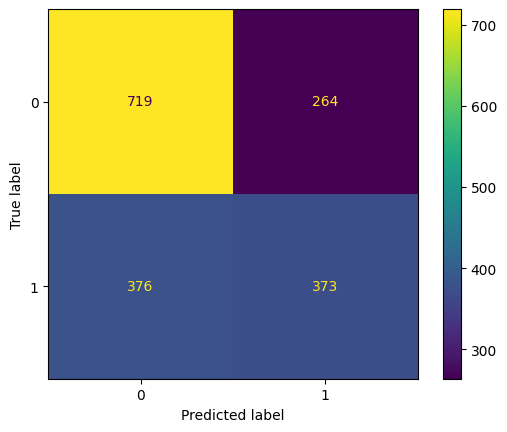

In [ ]:
from sklearn.ensemble import RandomForestClassifier



model = RandomForestClassifier(criterion='gini', max_depth= 80) # 0.57
model.fit(X_train,y_train)
# print(model.depth)

y_pred = model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Aumentou       0.66      0.73      0.69       983
    Diminuiu       0.59      0.50      0.54       749

    accuracy                           0.63      1732
   macro avg       0.62      0.61      0.62      1732
weighted avg       0.63      0.63      0.63      1732



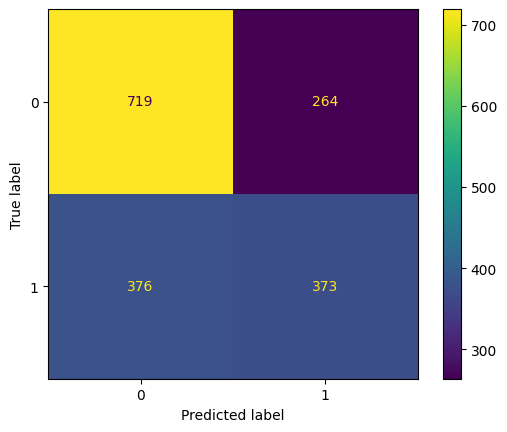

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),max_iter=10000,random_state=1, activation='relu', solver='adam', alpha=0.0001)
mlp.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test,y_pred))

# from sklearn.neural_network import MLPClassifier


# mlp = MLPClassifier(hidden_layer_sizes=(100,200,70),max_iter=8000,random_state=1, activation='relu', solver='adam', alpha=0.001)
# mlp.fit(X_train, y_train.values.ravel())

